#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

 # Basic Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [7]:
print(df.shape)
n_rows, n_cols = df.shape
print("Number of Rows: ", n_rows)
print("Number of Columns: ", n_cols)

(148654, 13)
Number of Rows:  148654
Number of Columns:  13


## Data types for each column

In [19]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

## Check for missing values in each column


In [9]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# Descriptive Statistics
---
## Salary statistics

In [8]:
#'TotalPay' -> salary

# Calculate mean salary
mean_salary = df['TotalPay'].mean()
print("Mean Salary:", mean_salary)

# Calculate median salary
median_salary = df['TotalPay'].median()
print("Median Salary:", median_salary)

# Calculate mode salary
mode_salary = df['TotalPay'].mode()[0]
print("Mode Salary:", mode_salary)

# Calculate minimum salary
min_salary = df['TotalPay'].min()
print("Minimum Salary:", min_salary)

# Calculate maximum salary
max_salary = df['TotalPay'].max()
print("Maximum Salary:", max_salary)

# Calculate range of salaries
salary_range = max_salary - min_salary
print("Range of Salaries:", salary_range)

# Calculate standard deviation of salaries
salary_std = df['TotalPay'].std()
print("Standard Deviation of Salaries:", salary_std)


Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Range of Salaries: 568213.56
Standard Deviation of Salaries: 50517.005273949944


# Data Cleaning

In [10]:
#Drop columns denfits , notes and status
#because have alot of missing

df.drop('Benefits',axis=1,inplace=True)
df.drop('Notes',axis=1,inplace=True)
df.drop('Status',axis=1,inplace=True)

#BasePay have small missing data
#drop all Null

df.dropna(inplace=True)

#creat new DataFrame to save original data
new_df=df.drop('Id',axis=1)

# Basic Data Visualization

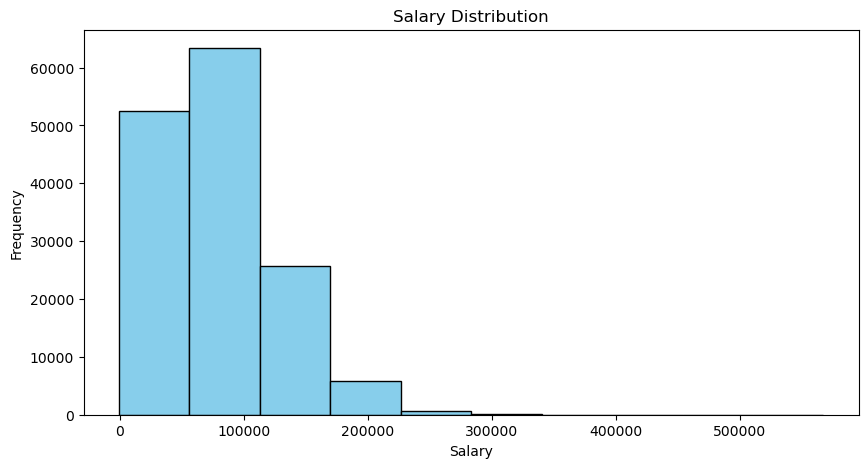

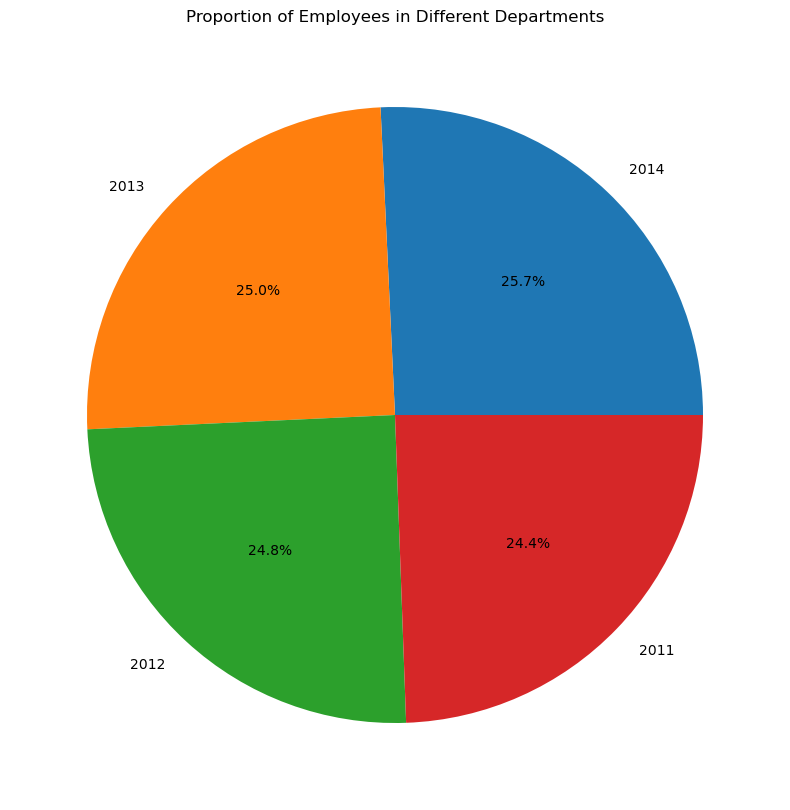

In [13]:
# Histogram for salary distribution
plt.figure(figsize=(10, 5))
plt.hist(df['TotalPay'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

# Pie chart for proportion of employees in different departments
plt.figure(figsize=(20, 10))
dept_counts = df['Year'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()


# Grouped Analysis

In [14]:
# Group data by department and calculate summary statistics for each group
grouped_stats = df.groupby('JobTitle')['TotalPay'].describe().T
print("Grouped Summary Statistics for Salary:")
grouped_stats


Grouped Summary Statistics for Salary:


JobTitle,ACCOUNT CLERK,ACCOUNTANT,ACCOUNTANT INTERN,"ACPO,JuvP, Juv Prob (SFERS)",ACUPUNCTURIST,ADMINISTRATIVE ANALYST,ADMINISTRATIVE ANALYST II,ADMINISTRATIVE ANALYST III,ADMINISTRATIVE ENGINEER,ADMINISTRATIVE SERVICES MANAGER,...,Window Cleaner Supervisor,Wire Rope Cable Maint Mechanic,Wire Rope Cable Maint Sprv,Worker's Comp Supervisor 1,Worker's Compensation Adjuster,X-RAY LABORATORY AIDE,X-Ray Laboratory Aide,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",Youth Comm Advisor,ZOO CURATOR
count,83.000000,5.000000,48.000000,1.00,1.0,93.000000,2.000000,2.000000,10.000000,3.00000,...,3.000000,29.000000,3.000000,14.000000,74.000000,26.000000,100.000000,1.00,4.000000,1.00
mean,44035.664337,47429.268000,29031.742917,62290.78,67594.4,63954.867527,61497.035000,92698.515000,127961.430000,77015.58000,...,77512.493333,116080.888966,203033.720000,70389.297143,73249.269865,52705.880385,50823.942700,53632.87,41414.307500,66686.56
std,13170.742908,27137.331315,20711.322649,NaN,NaN,18613.695839,19924.550824,209.989501,14993.074838,20033.53961,...,3653.407319,56352.451981,18943.310631,38380.304769,20057.372880,19760.943417,24170.083004,NaN,17311.066571,NaN
min,614.000000,1148.400000,2981.530000,62290.78,67594.4,2388.240000,47408.250000,92550.030000,91833.330000,54261.37000,...,73329.000000,4219.660000,190575.900000,56.640000,1837.390000,5343.690000,1007.000000,53632.87,19212.710000,66686.56
25%,42984.010000,45304.380000,9940.000000,62290.78,67594.4,62136.510000,54452.642500,92624.272500,129235.230000,69522.37000,...,76231.475000,84566.820000,192133.845000,41840.500000,69508.625000,51729.915000,26919.207500,53632.87,32152.610000,66686.56
50%,49777.820000,60076.240000,17658.505000,62290.78,67594.4,71602.900000,61497.035000,92698.515000,130171.065000,84783.37000,...,79133.950000,131611.440000,193691.790000,92558.110000,80348.540000,60333.125000,60047.290000,53632.87,44449.895000,66686.56
75%,50401.810000,65225.310000,53789.800000,62290.78,67594.4,75005.630000,68541.427500,92772.757500,133775.530000,88392.68500,...,79604.240000,154625.470000,209262.630000,100810.357500,85185.037500,64305.285000,68306.242500,53632.87,53711.592500,66686.56
max,60838.200000,65392.010000,58799.530000,62290.78,67594.4,79754.030000,75585.820000,92847.000000,149322.230000,92002.00000,...,80074.530000,189630.640000,224833.470000,108810.030000,106050.660000,85077.400000,99812.970000,53632.87,57544.730000,66686.56


In [15]:
# Compare average salaries across different groups
average_salary = df.groupby('JobTitle')['TotalPay'].mean()
print("Average Salary :")
average_salary


Average Salary :


JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2154, dtype: float64

# Simple Correlation Analysis

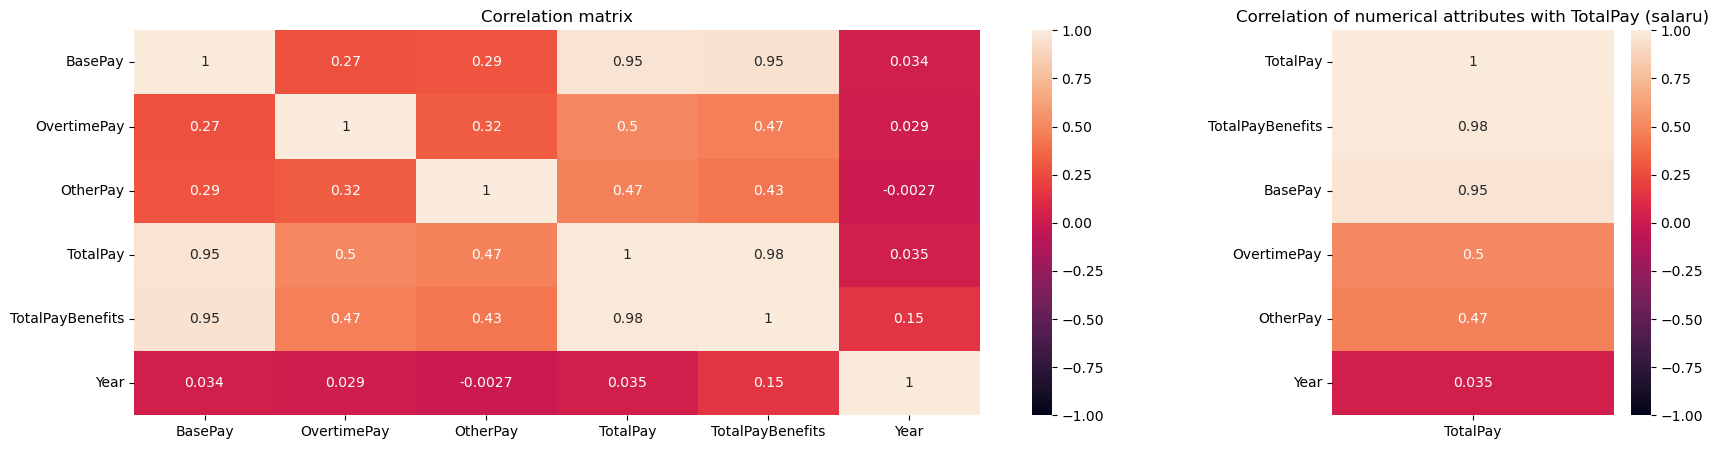

In [19]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=new_df.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=new_df.corr(method="pearson", numeric_only=True)[["TotalPay"]].sort_values('TotalPay', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with TotalPay (salaru)")
plt.show()

# Good Luck!